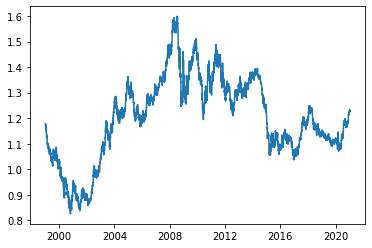

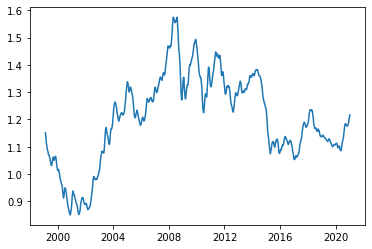

In [47]:
import pandas as pd
from matplotlib import pyplot as plt, style as style

rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
#print(rates.info()) #Checking the no of rows & columns
#print(rates.head())
#Most columns have objects, some have null values
#We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
rates.rename({'[US dollar ]': 'US_dollar', 'Period\\Unit:':'Time'}, axis=1, inplace=True)
#print(rates.columns)
#Now I will change the data in the Time column to a datetime object
rates['Time'] = pd.to_datetime(rates['Time'])
#print(rates['Time'].head(20)) #This is to check if the data is arranged by time
#The above shows the data is arranged in descending order, now we will change it to ascending order
rates.sort_values('Time',inplace=True)
#print(rates['Time'].head(20))
#Now the indes is starting from 5698, we have to reset this
rates.reset_index(drop=True, inplace=True)
#print(rates['Time'].head(20))

#Now we will only be working with the Us dollar and Time columns, so I will create a seperate dataframe for them
euro_dollar = rates[['Time','US_dollar']]
#print(euro_dollar.info())

#Now lets find out how many values are in US dollar
#print(euro_dollar['US_dollar'].value_counts())
#We can see some rows have '-', we have to drop these rows
euro_dollar = euro_dollar[euro_dollar['US_dollar'] != '-']
#print(euro_dollar['US_dollar'].value_counts())
#Now we will convert the datatype in the us dollar column to float
euro_dollar['US_dollar']=euro_dollar['US_dollar'].astype(float)


plt.plot(euro_dollar['Time'], euro_dollar['US_dollar'])
plt.show()

#Because we have so many variations in a day, we can use the rolling mean method
#We call the number of days used in the calculation the rolling window (or moving window).
#If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

euro_dollar['rolling_mean'] = euro_dollar['US_dollar'].rolling(30).mean()
#print(euro_dollar['rolling_mean'].head(31))
plt.plot(euro_dollar['Time'], euro_dollar['rolling_mean'])
plt.show()

#We show comparatively how the euro-dollar rate changed under the last three US presidents
#(George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021))
#We can use a line plot.